# DatasetParticionado PCA y t-sne

In [2]:
import numpy as np
from sklearn.manifold import TSNE

In [3]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)

In [8]:
from pandas import read_csv
#data = read_csv('snd-dataset-from-plain-json.csv')
data = read_csv('snd-segmented-dataset-from-plain-json.csv')
#data = read_csv('snd-segmented-dataset-from-json-ld.csv')

data.head()

,Duration,Loudness,LogAttackTime,Tempo,Tempo.confidence,TemporalCentroid,SingleEvent,Loop,Tonality,Tonality.confidence,DynamicRange,Note.midi,Note.frequency,Note.confidence,Genre,Mood
0,5.0,-15.304321,0.662552,103,0.0,0.572003,False,False,G major,0.887811,2.226904,66,384.759399,0.000000,Genre A,Mood A
1,5.0,-19.805204,-0.860892,99,0.0,0.539102,False,False,A major,0.798364,1.200455,36,67.521309,0.000000,Genre A,Mood A
2,5.0,-24.740988,-1.379621,116,0.0,0.431652,True,False,F# major,0.494744,2.358749,68,427.887085,0.287887,Genre A,Mood A
3,5.0,-10.838598,0.478131,146,0.0,0.497631,False,False,C major,0.714704,0.501460,60,263.397491,0.000000,Genre A,Mood A
4,5.0,-35.420860,0.560322,98,0.0,0.498890,True,False,A# minor,0.470257,0.576118,47,126.194229,0.623586,Genre B,Mood B


In [18]:
# Se eliminan columnas que no se van a a usar para la proyección (valor 'confidence' sobre otros parámetros calculados)
# ld json
#data = data.drop("Key", axis=1);
#data = data.drop("Key.confidence", axis=1);
#data = data.drop("Pitch.confidence", axis=1);
#data = data.drop("Tempo.confidence", axis=1);

# plain json
#data = data.drop("Tempo.confidence", axis=1);
#data = data.drop("Tonality.confidence", axis=1);
#data = data.drop("Note.confidence", axis=1);

In [9]:
# Descarto columnas que no se van a usar por ahora
# Tip: axis number (0 for rows and 1 for columns)
data = data.drop("Tempo.confidence", axis=1);
data = data.drop("Tonality.confidence", axis=1);
data = data.drop("Note.confidence", axis=1);
data = data.drop("Loop", axis=1);
data = data.drop("SingleEvent", axis=1);

#key_to_number_list = ['A minor', 'A major', 'A# minor', 'A# major', 'B minor', 'B major', 'C minor', 'C major', 'C# minor', 'C# major', 'D minor', 'D major', 'D# minor', 'D# major','E minor', 'E major', 'F minor', 'F major', 'F# minor', 'F# major', 'G minor', 'G major','G# minor', 'G# major']
#def keyToNumber(x_value):
#    return [i for i,x in enumerate(key_to_number_list) if x == x_value][0]# Mapeo de las tonalidades 'en texto' a categorias numéricas
#data['Tonality'] = data['Tonality'].map(keyToNumber)
data = data.drop("Tonality", axis=1);

# Mapeo de Género y Mood a 0/1
#data['Genre'] = data['Genre'].map(lambda x: 1 if x=='Genre A' else 0)
#data['Mood'] = data['Mood'].map(lambda x: 1 if x=='Mood A' else 0)
data = data.drop("Genre", axis=1);
data = data.drop("Mood", axis=1);

In [10]:
data

,Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,DynamicRange,Note.midi,Note.frequency
0,5.0,-15.304321,0.662552,103,0.572003,2.226904,66,384.759399
1,5.0,-19.805204,-0.860892,99,0.539102,1.200455,36,67.521309
2,5.0,-24.740988,-1.379621,116,0.431652,2.358749,68,427.887085
3,5.0,-10.838598,0.478131,146,0.497631,0.501460,60,263.397491
4,5.0,-35.420860,0.560322,98,0.498890,0.576118,47,126.194229
5,5.0,-20.489141,0.304805,144,0.466673,0.555927,59,257.612000
6,5.0,-27.387766,0.323974,89,0.594654,2.138231,52,165.785324
7,5.0,-19.199152,-0.461596,120,0.501260,0.416643,49,139.304810
8,5.0,-24.190746,0.608560,126,0.505493,0.546795,53,176.563248
9,5.0,-13.406298,0.210753,122,0.502783,0.292836,39,82.365143


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd

X = data
X_scaled = scale(X, axis=0, with_mean=True, with_std=True, copy=True)

# Nota: En sklearn PCA esta implementado como una descomposición SVD
# Libro hands on ML, p.214 (chapter 8)
pca = PCA()
pca.fit(X_scaled)

# Y el acumulado agregando dimensiones
np.cumsum(pca.explained_variance_ratio_)

/home/hordia/VirtualEnvs/RedPanalDBAnalysis/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if sys.path[0] == '':


array([0.22330885, 0.39406594, 0.54792524, 0.67673096, 0.79743683,
       0.88596518, 0.96872583, 1.        ])

# 2 dimensiones

## PCA

Text(0.5, 1.0, 'PCA: Representación de la proyección de los datos en 2 dimensiones')

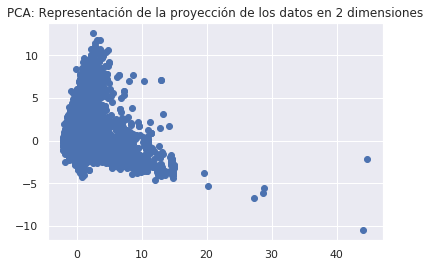

In [12]:
# 2 dimensiones representan el 41% de los datos

pca = PCA(n_components=2)
projected = pca.fit_transform(X_scaled)
plt.scatter(projected[:, 0], projected[:, 1])
plt.title("PCA: Representación de la proyección de los datos en 2 dimensiones")

## t-sne

In [15]:
from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2).fit_transform(data)
X_embedded.shape

(56085, 2)

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

Text(0.5, 1.0, 't-sne: Representación de la proyección de los datos en 2 dimensiones')

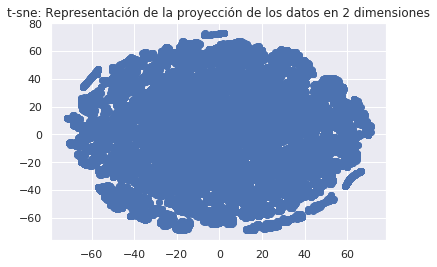

In [20]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title("t-sne: Representación de la proyección de los datos en 2 dimensiones")

## Conclusión parcial

En PCA 2 dimensiones representan el 39% de los datos. 3 dimensiones (representan el 55% de los datos)


Referencia (con dataset sin particionar): [3 - Reducción de la dimensionalidad SVD y PCA](3%20-%20Reducción%20de%20la%20dimensionalidad%20SVD%20y%20PCA.ipynb)
y [5 - t-sne](5%20-%20t-sne.ipynb)


# 3 dimensiones

## PCA

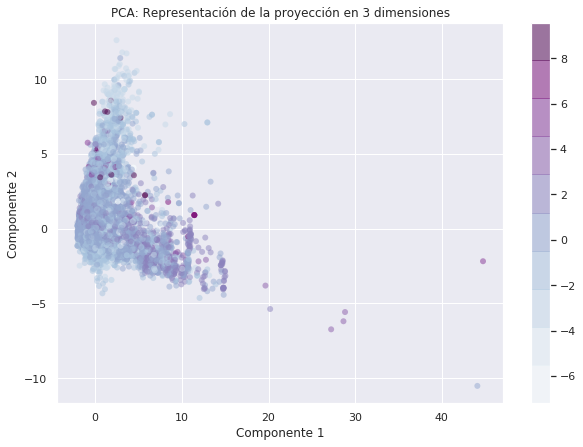

In [21]:
# 3 dimensiones (representan el 58% de los datos)
pca = PCA(n_components=3)
projected = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=projected[:, 2], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu', 10))
plt.title("PCA: Representación de la proyección en 3 dimensiones")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();

## t-sne

In [25]:
# 3 dimensiones
projected = TSNE(n_components=3).fit_transform(data)
projected.shape

(56085, 3)

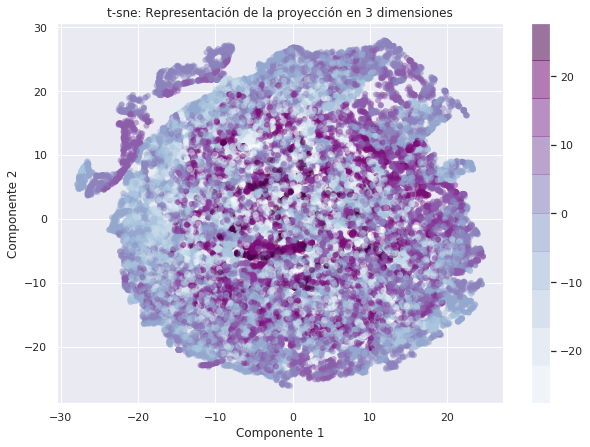

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=projected[:, 2], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu', 10))
plt.title("t-sne: Representación de la proyección en 3 dimensiones")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();

## Conclusión parcial


A diferencia de lo ocurrido con el dataset original, dónde tanto las proyecciones de PCA y t-sne daban resultados similares, en este caso, la proyección estadística t-sne no aporta demasiada información mostrando una masa uniforme, tanto en 2D como en 3D. Se interpreta que la razón se debe a que se dividieron los archivos originales generando una diversidad de muestras demasiado amplia.

Siguiente: []()